In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
from scipy.stats import shapiro
import scipy.stats as stats

In [ ]:
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/cookie_cats.csv')
data.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
data.userid.nunique() == data.shape[0]

True

In [ ]:
data.describe()[['sum_gamerounds']].T

,count,mean,std,min,25%,50%,75%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,5.0,16.0,51.0,49854.0


In [ ]:
data.groupby('version')['sum_gamerounds'].agg(['count','median','mean','std','max'])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


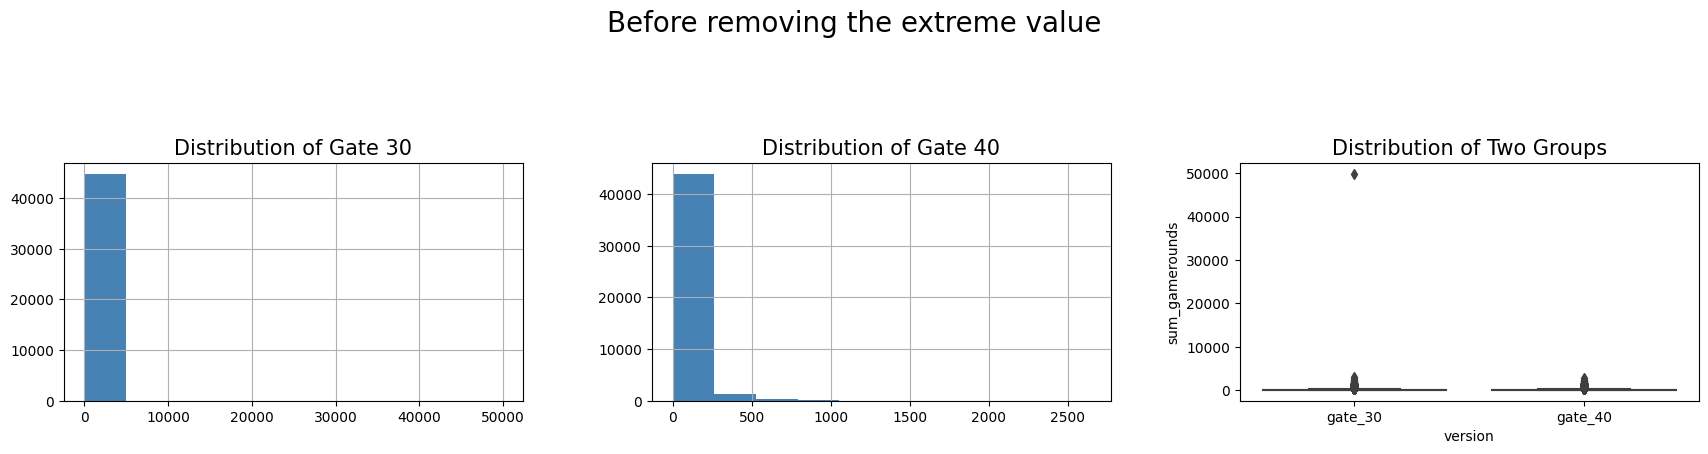

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (18,5))
data[data.version == 'gate_30'].hist('sum_gamerounds', ax = axes[0], color = 'steelblue')
data[data.version == 'gate_40'].hist('sum_gamerounds', ax = axes[1], color = 'steelblue')
sns.boxplot(x = data.version, y = data.sum_gamerounds, ax = axes[2])

plt.suptitle('Before removing the extreme value', fontsize = 20)
axes[0].set_title('Distribution of Gate 30', fontsize = 15)
axes[1].set_title('Distribution of Gate 40', fontsize = 15)
axes[2].set_title('Distribution of Two Groups', fontsize = 15)

plt.tight_layout(pad = 4)


In [ ]:
data[data.version == "gate_30"].reset_index().set_index("index")

,userid,version,sum_gamerounds,retention_1,retention_7
index,,,,,
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False
...,...,...,...,...,...
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False


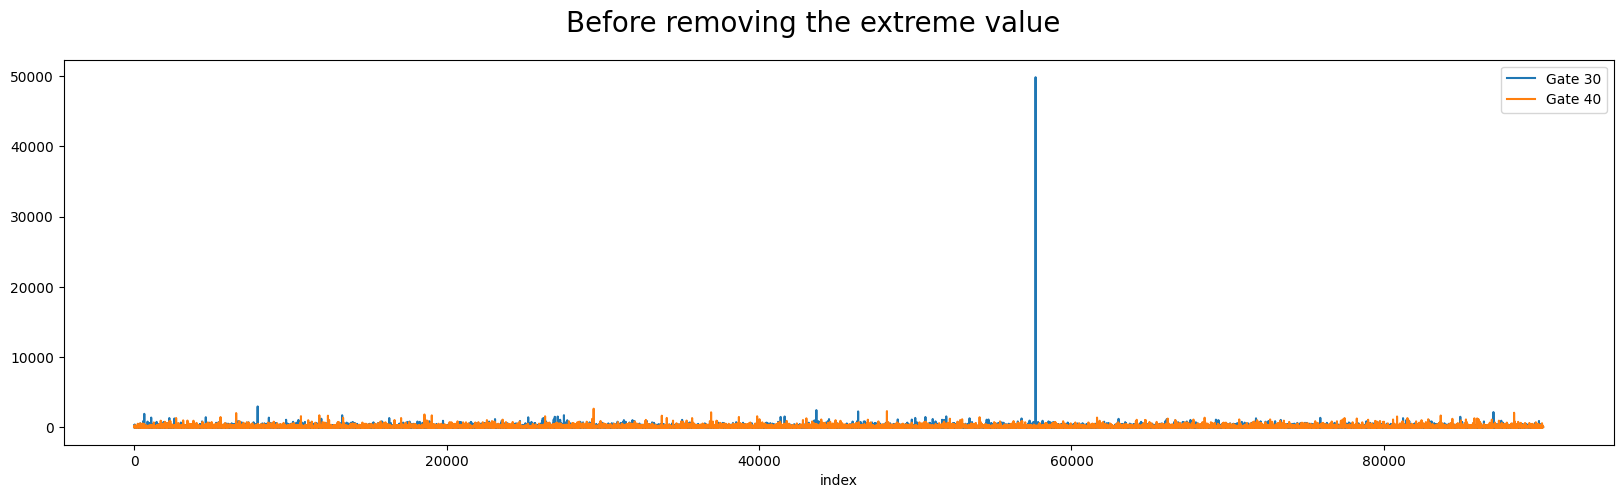

In [ ]:
data[data.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
data[data.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40")
plt.suptitle("Before removing the extreme value", fontsize = 20);

In [ ]:
data = data[data.sum_gamerounds < data.sum_gamerounds.max()]
data.describe()[['sum_gamerounds']].T

,count,mean,std,min,25%,50%,75%,max
sum_gamerounds,90188.0,51.320253,102.682719,0.0,5.0,16.0,51.0,2961.0


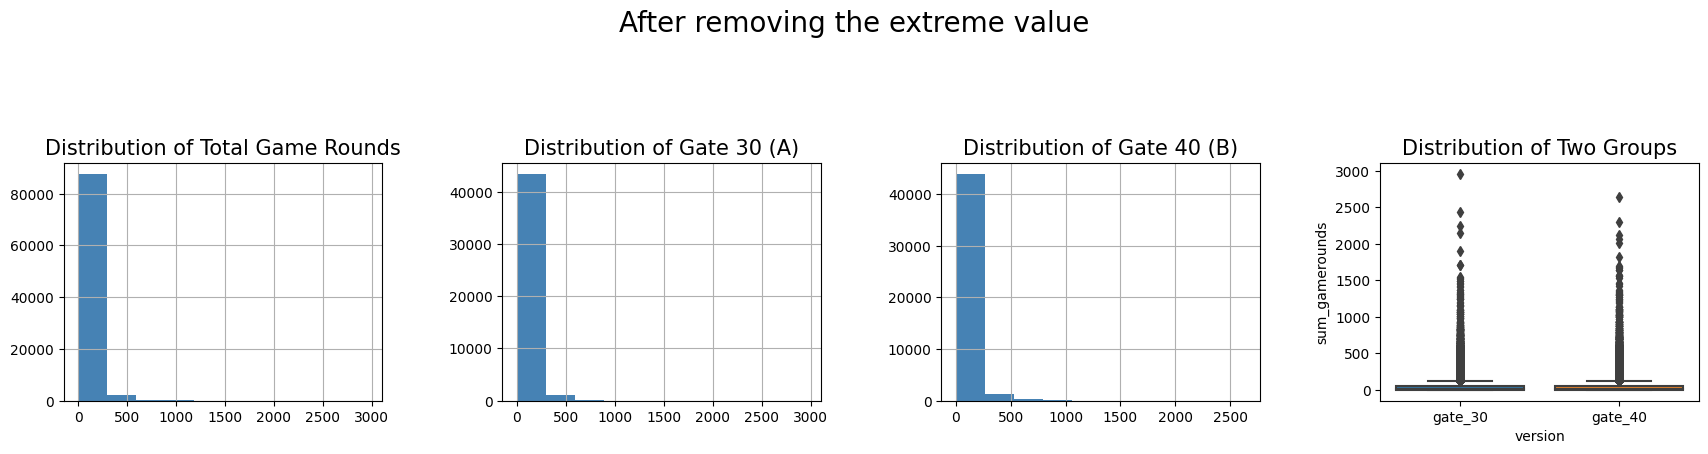

In [ ]:
fig, axes = plt.subplots(1, 4, figsize = (18,5))
data.sum_gamerounds.hist(ax = axes[0], color = "steelblue")
data[(data.version == "gate_30")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
data[(data.version == "gate_40")].hist("sum_gamerounds", ax = axes[2], color = "steelblue")
sns.boxplot(x = data.version, y = data.sum_gamerounds, ax = axes[3])

plt.suptitle("After removing the extreme value", fontsize = 20)
axes[0].set_title("Distribution of Total Game Rounds", fontsize = 15)
axes[1].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[2].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[3].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4)

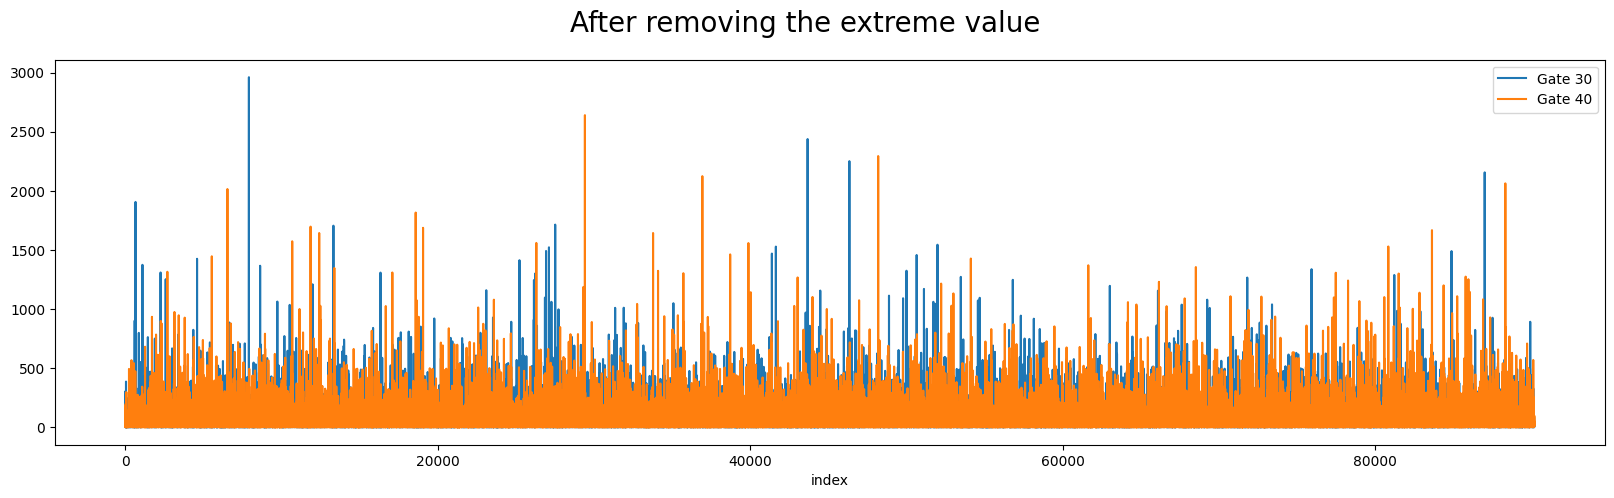

In [ ]:
data[data.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
data[data.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40")
plt.suptitle("After removing the extreme value", fontsize = 20);

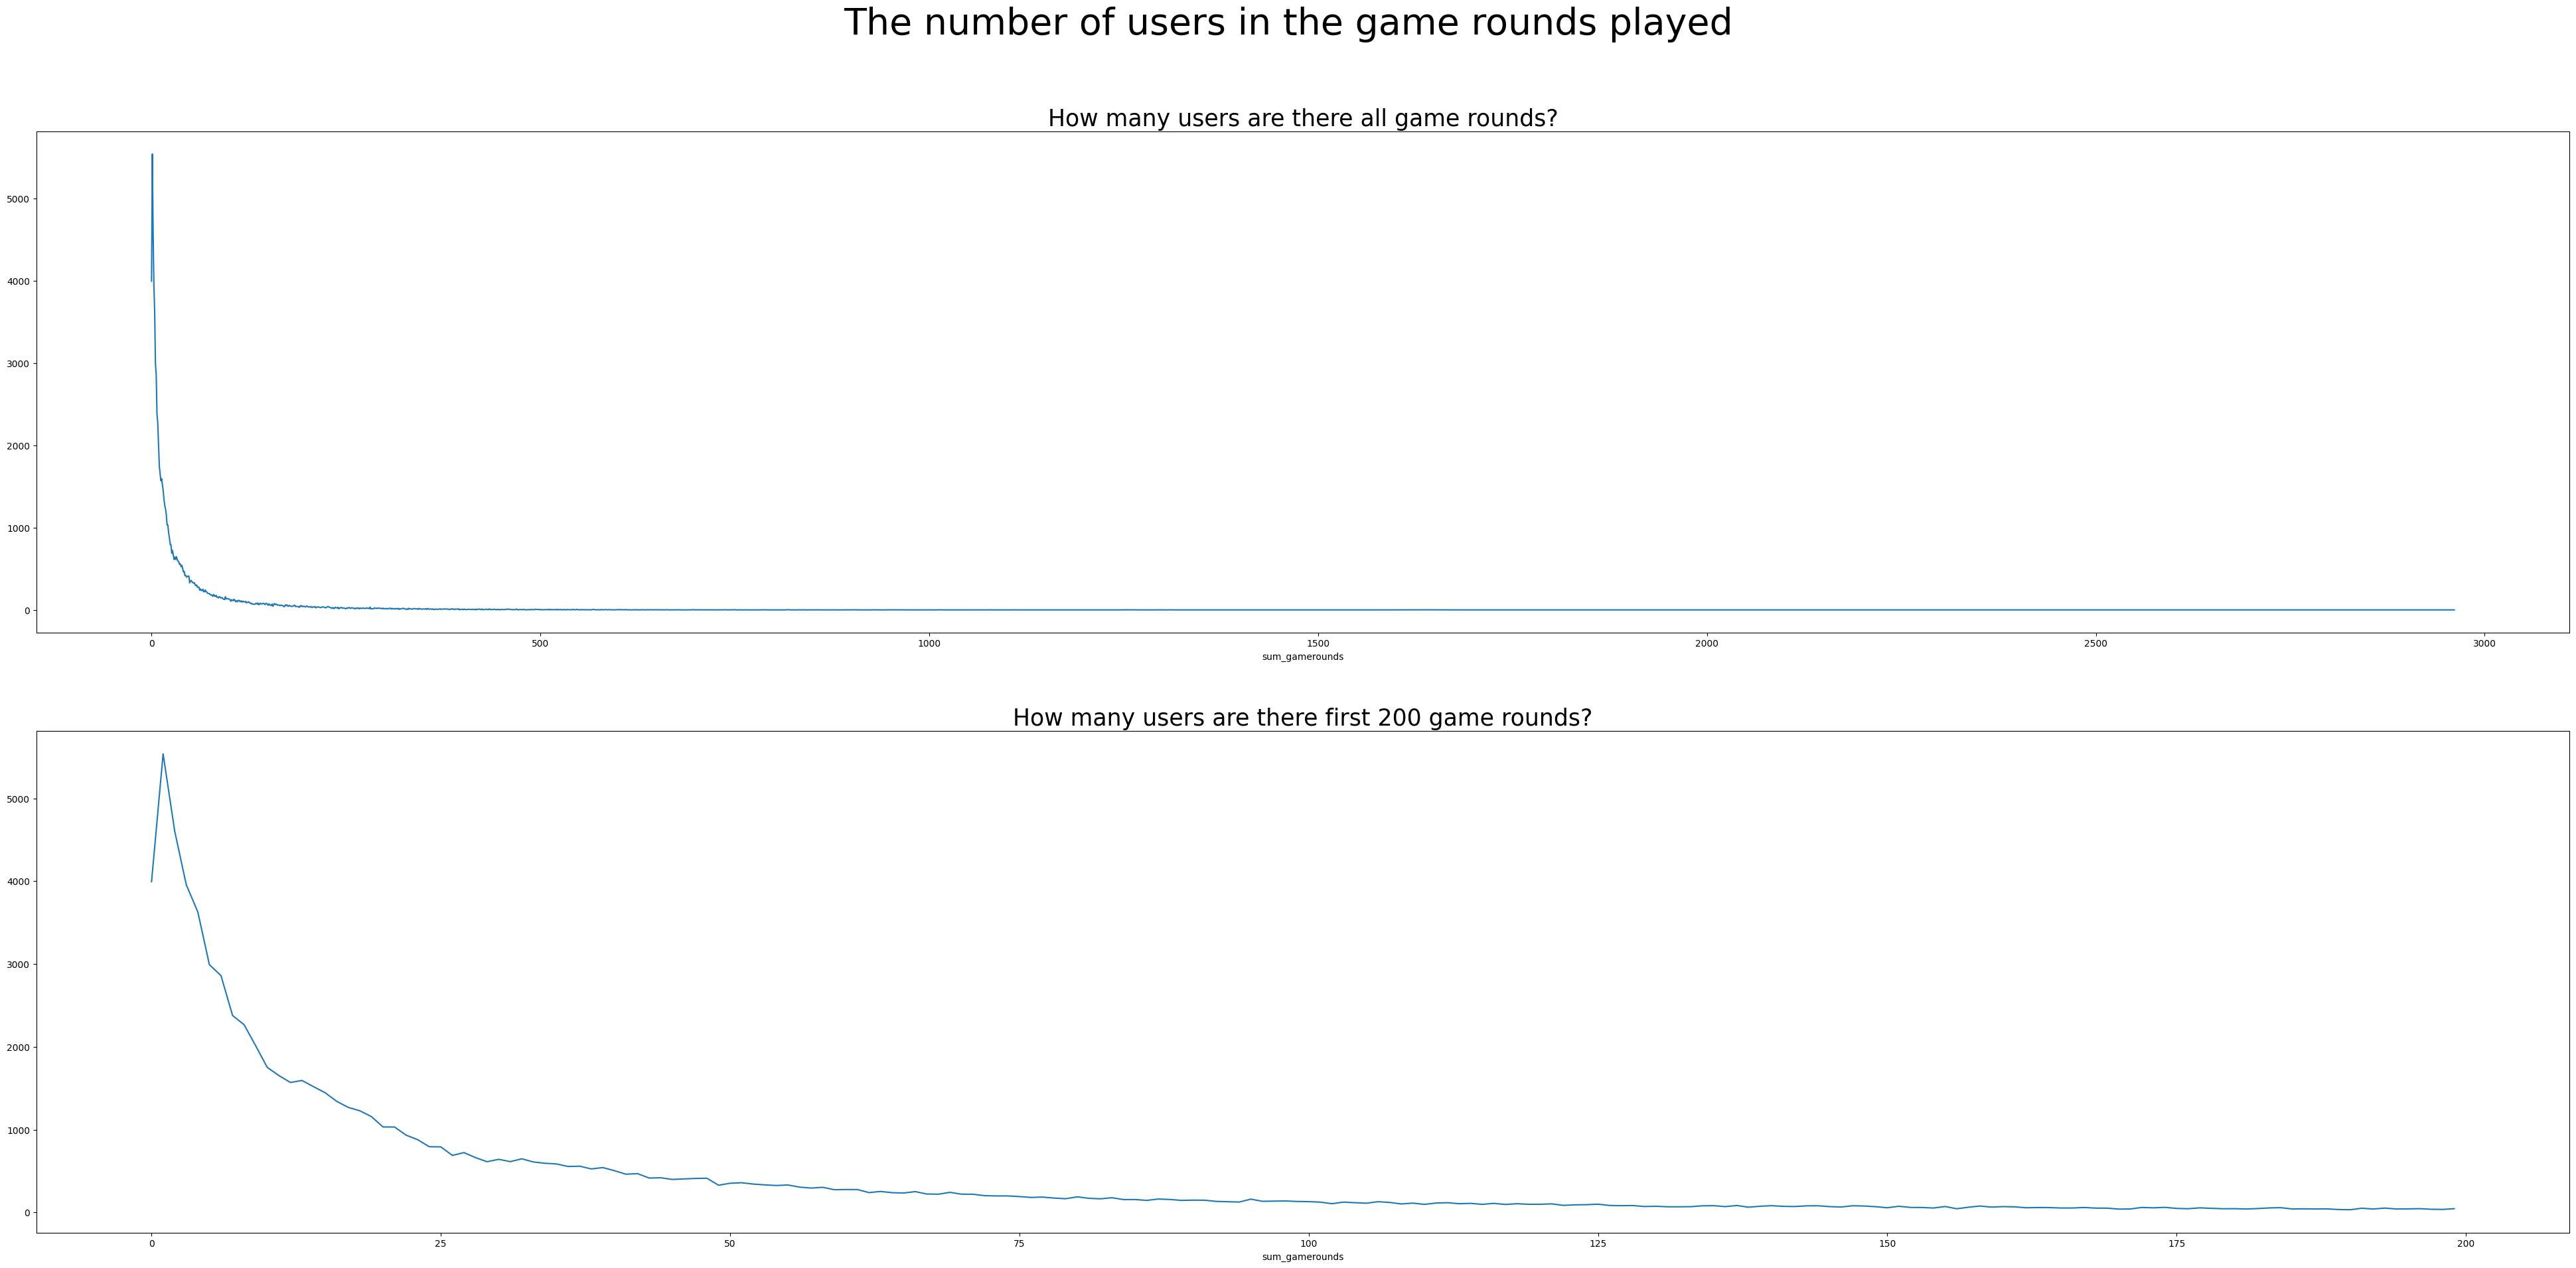

In [ ]:
fig, axes = plt.subplots(2, 1, figsize = (40,20))
data.groupby("sum_gamerounds").userid.count().plot(ax = axes[0])
data.groupby("sum_gamerounds").userid.count()[:200].plot(ax = axes[1])
plt.suptitle("The number of users in the game rounds played", fontsize = 40)
axes[0].set_title("How many users are there all game rounds?", fontsize = 25)
axes[1].set_title("How many users are there first 200 game rounds?", fontsize = 25)
plt.tight_layout(pad=5);

In [ ]:
# How many users reached gate 30 & gate 40 levels?
data.groupby("sum_gamerounds").userid.count().loc[[30,40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

In [ ]:
#whether two groups are statistically different?
data.groupby('version').sum_gamerounds.agg(['count','mean','median','std','max'])

,count,mean,median,std,max
version,,,,,
gate_30,44699,51.342111,17.0,102.057598,2961
gate_40,45489,51.298776,16.0,103.294416,2640


retention_1 - did the player come back and play 1 day after installing?

retention_7 - did the player come back and play 7 days after installing?

In [ ]:
pd.DataFrame({"RET1_COUNT": data["retention_1"].value_counts(),
              "RET7_COUNT": data["retention_7"].value_counts(),
              "RET1_RATIO": data["retention_1"].value_counts() / len(data),
              "RET7_RATIO": data["retention_7"].value_counts() / len(data)})

,RET1_COUNT,RET7_COUNT,RET1_RATIO,RET7_RATIO
False,50035,73408,0.554786,0.813944
True,40153,16780,0.445214,0.186056


In [ ]:
data.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median       mean         std   max
version retention_1                                            
gate_30 False        24665     6.0  16.359092   36.528426  1072
        True         20034    48.0  94.411700  135.037697  2961
gate_40 False        25370     6.0  16.340402   35.925756  1241
        True         20119    49.0  95.381182  137.887256  2640

In [ ]:
data.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median        mean         std   max
version retention_7                                             
gate_30 False        36198    11.0   25.796508   43.316158   981
        True          8501   105.0  160.117516  179.358560  2961
gate_40 False        37210    11.0   25.856356   44.406112  2640
        True          8279   111.0  165.649837  183.792499  2294

In [ ]:
data['Retention'] = np.where((data.retention_1 == True) & (data.retention_7 == True),1,0)

In [ ]:
data.groupby(['version','Retention'])['sum_gamerounds'].agg(["count", "median", "mean", "std", "max"])

count  median        mean         std   max
version Retention                                             
gate_30 0          38023    12.0   28.070273   48.017452  1072
        1           6676   127.0  183.886309  189.626390  2961
gate_40 0          38983    12.0   28.103353   48.927850  2640
        1           6506   133.0  190.282355  194.220077  2294

In [ ]:
data["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), data.retention_1, data.retention_7))
data.groupby(["version", "NewRetention"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,22840,6.0,11.819746,21.642643,981
1,gate_30,False-True,1825,43.0,73.169315,93.222330,1072
2,gate_30,True-False,13358,33.0,49.694490,58.125396,918
3,gate_30,True-True,6676,127.0,183.886309,189.626390,2961
4,gate_40,False-False,23597,6.0,11.913294,20.901020,547
5,gate_40,False-True,1773,47.0,75.261139,94.478048,1241
6,gate_40,True-False,13613,32.0,50.025490,60.924587,2640
7,gate_40,True-True,6506,133.0,190.282355,194.220077,2294


**A/B Test**

In [ ]:
data['version'] = np.where(data.version == 'gate_30', 'A', 'B')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True


In [ ]:
group_A = data[data['version'] == 'A']['sum_gamerounds']
group_B = data[data['version'] == 'B']['sum_gamerounds']

In [ ]:
#whether the distributions are normal
ntA = shapiro(group_A)[1] < 0.05
ntB = shapiro(group_B)[1] < 0.05
if (ntA == False) & (ntB == False):
  #Homogeneity of variances: H0- Homogeneous- False, H1- Heterogenous- True
  leveneTest = stats.levene(group_A, group_B)[1] < 0.05
  if leveneTest == False:
    ttest = stats.ttest_ind(group_A, group_B, equal_var = True)[1]
  else: 
    ttest = stats.ttest_ind(group_A, group_B, equal_var = False)[1]
else: 
  ttest = stats.mannwhitneyu(group_A, group_B)[1]
  # H0: M1 == M2 - False
  # H1: M1 != M2 - True

temp = pd.DataFrame({'AB Hypothesis': [ttest < 0.05], 'p-value': [ttest]})
temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")

if (ntA == False) & (ntB == False):
  temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
  temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
else:
  temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
  # Print Hypothesis
  print("# A/B Testing Hypothesis")
  print("H0: A == B")
  print("H1: A != B", "\n")


# A/B Testing Hypothesis
H0: A == B
H1: A != B 



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
temp

,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Fail to Reject H0,0.050892,A/B groups are similar!
